### Module 7: Deep learning – Neural Networks
#### Nutta Sittirash

In [286]:
import pandas as pd
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df.head(5)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507


In [287]:
df.shape

(4962, 9)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


In [289]:
max_delay_row = df[df['Arrival_delay'] == df['Arrival_delay'].max()]
print(max_delay_row)

          Arrival_time  Stop_id  Bus_id  Line_id  Arrival_delay  Dwell_time  \
4503  25/05/2022 06:42    10261   44418        4           1846           0   

      Scheduled_travel_time  Upstream_stop_delay  Recurrent_delay  
4503                    120                 1812       155.141844  


In [290]:
df = df.iloc[:1000]
df = df.drop(['Arrival_time','Stop_id', 'Bus_id', 'Line_id'], axis = 1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

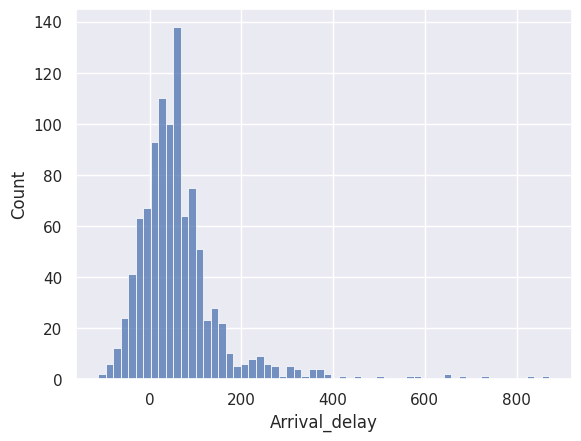

In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.histplot(x=df['Arrival_delay'])

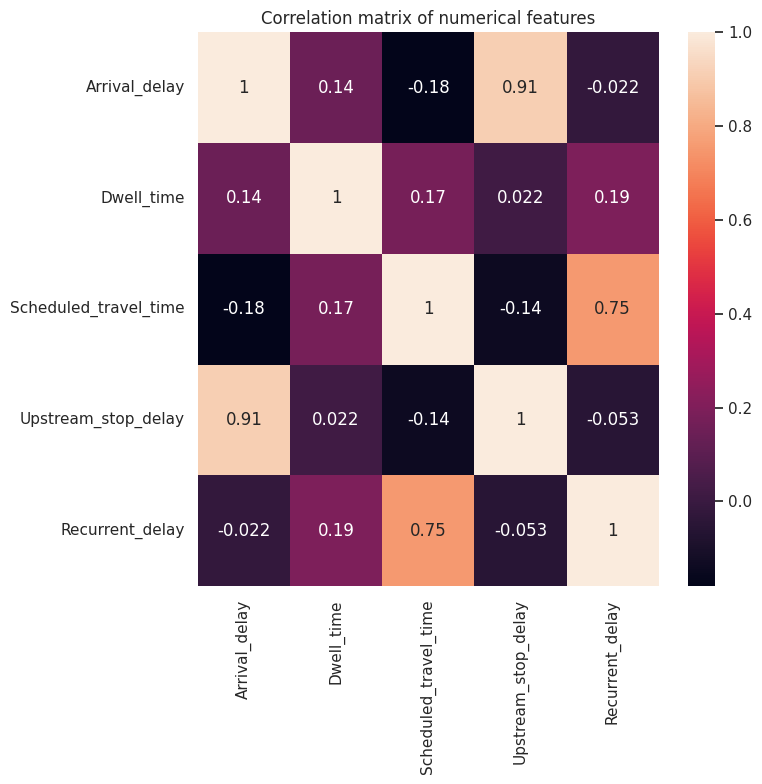

In [292]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)
plt.subplots(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

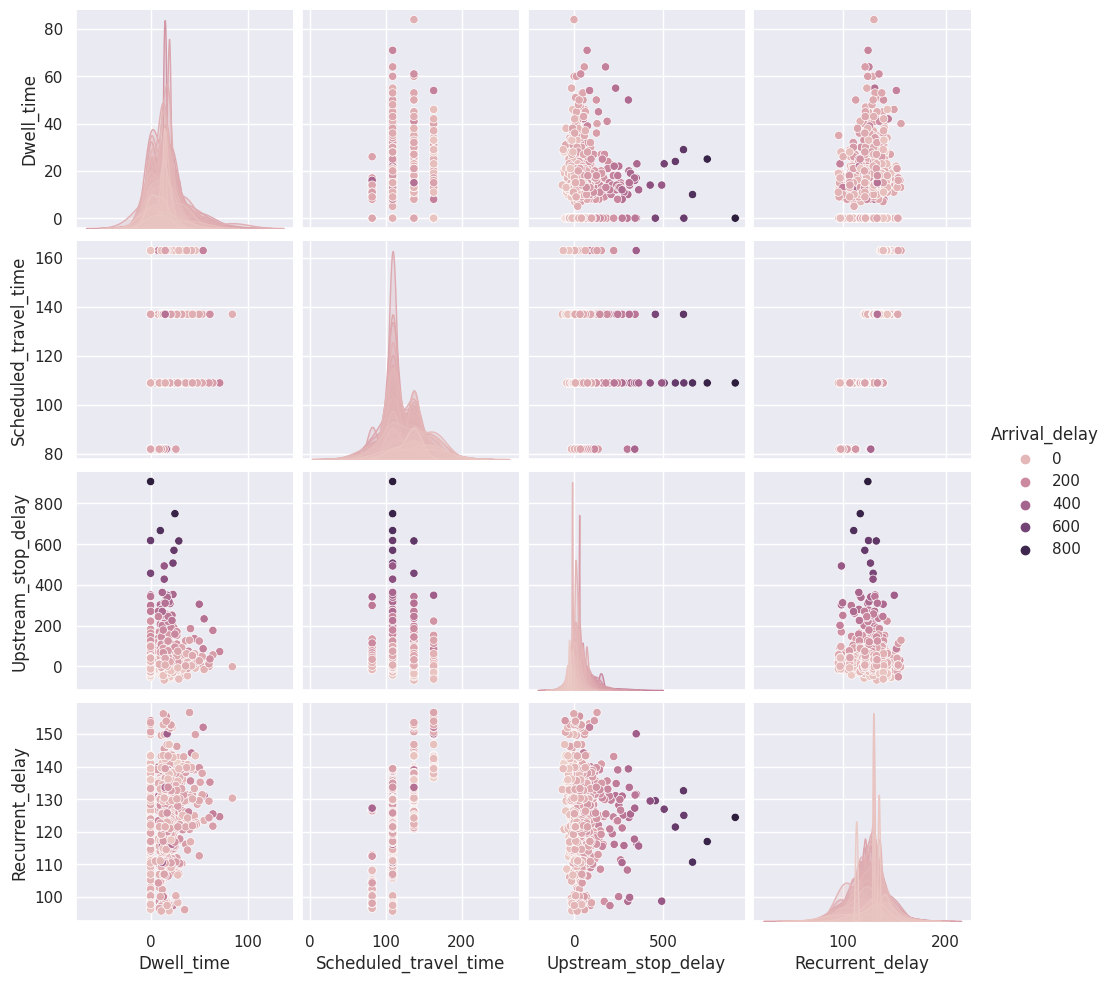

In [293]:
import pandas as pd

# create a DataFrame 'x' containing all columns except 'Arrival_delay'
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']

combined_data = pd.concat([x, y], axis=1)
# use seaborn's pairplot to visualize pairwise relationships between the features in 'x'
sns.pairplot(combined_data, hue='Arrival_delay', diag_kind='kde')

### Model1: Create a NN model

In [294]:
pip install --upgrade tensorflow

In [295]:
# data processing
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [296]:
# network construction
def construct_network_model():
  model_1 = Sequential()
  model_1.add(Dense(32, activation='relu', input_dim=4))
  model_1.add(Dense(64, activation='relu'))
  model_1.add(Dense(1))
  return model_1

model_1 = construct_network_model()
model_1.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_1.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_201 (Dense)           (None, 32)                160       
                                                                 
 dense_202 (Dense)           (None, 64)                2112      
                                                                 
 dense_203 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 30.04142, saving model to weights.best.h5

Epoch 2: val_mae did not improve from 30.04142


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae did not improve from 30.04142

Epoch 4: val_mae did not improve from 30.04142

Epoch 5: val_mae did not improve from 30.04142

Epoch 6: val_mae did not improve from 30.04142
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 32.63068319682032
Mean Squared Error: 1894.819409901273
R-squared: 0.8393947320128966
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 32.63068319682032
Mean Squared Error: 1894.819409901273
R-squared: 0.8393947320128966


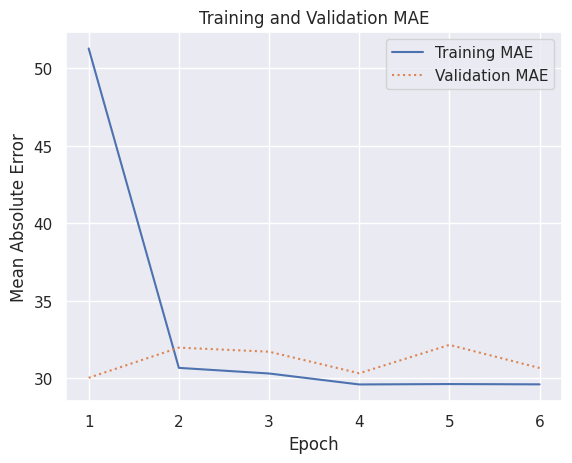

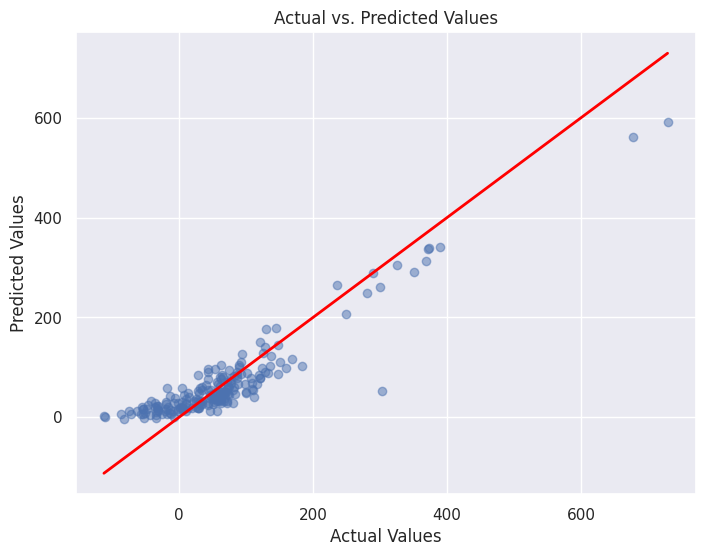

In [297]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_1.fit(x_train, y_train, validation_split=0.2, epochs=29, batch_size=14, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_1.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_1 = load_model(filepath)
  y_pred = model_1.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Model2: Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

In [310]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
#df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [311]:
# network construction
def construct_network_model():
  model_2 = Sequential()
  model_2.add(Dense(64, activation='relu', input_dim=4))
  model_2.add(Dense(128, activation='relu'))
  model_2.add(Dense(1))
  return model_2

model_2 = construct_network_model()
model_2.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_2.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 64)                320       
                                                                 
 dense_217 (Dense)           (None, 128)               8320      
                                                                 
 dense_218 (Dense)           (None, 1)                 129       
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 25.98022, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 25.98022 to 25.43264, saving model to weights.best.h5

Epoch 3: val_mae did not improve from 25.43264

Epoch 4: val_mae did not improve from 25.43264

Epoch 5: val_mae did not improve from 25.43264

Epoch 6: val_mae did not improve from 25.43264

Epoch 7: val_mae did not improve from 25.43264
32/32 [==============================] - 0s 1ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 28.048583924140093
Mean Squared Error: 1413.285410299754
R-squared: 0.9072695884573362
32/32 [==============================] - 0s 1ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 28.048583924140093
Mean Squared Error: 1413.285410299754
R-squared: 0.9072695884573362


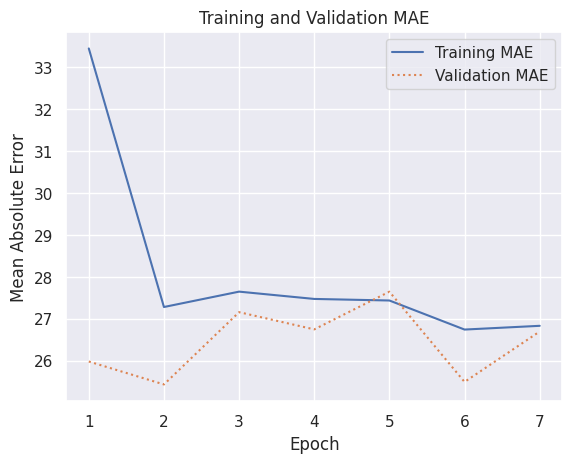

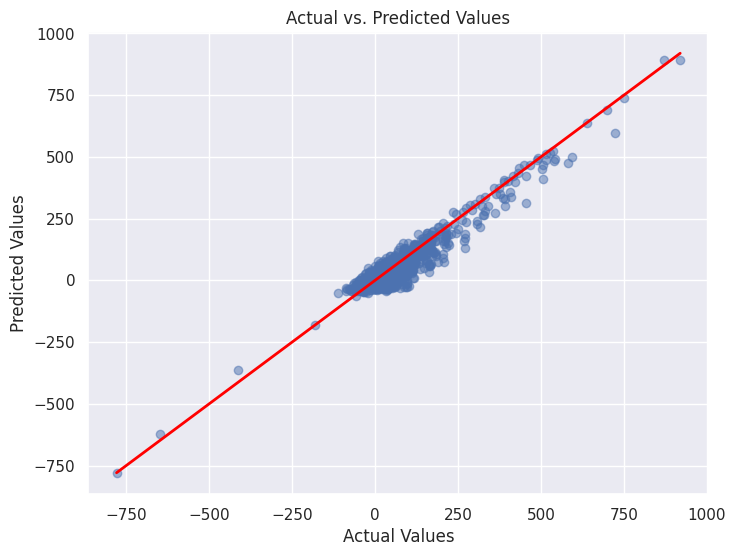

In [312]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_2.fit(x_train, y_train, validation_split=0.2, epochs=33, batch_size=18, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_2.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_2 = load_model(filepath)
  y_pred = model_2.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Model3: Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

In [313]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
#df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [314]:
# network construction
from tensorflow.keras.layers import PReLU
def construct_network_model():
  model_3 = Sequential()
  model_3.add(Dense(32, activation='relu', input_dim=4))
  model_3.add(Dense(64, activation='relu'))
  model_3.add(Dense(1))
  return model_3

model_3 = construct_network_model()
# model_3.compile(optimizer=Adam(learning_rate=0.02), loss='mae', metrics=['mae'])
model_3.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_3.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_219 (Dense)           (None, 32)                160       
                                                                 
 dense_220 (Dense)           (None, 64)                2112      
                                                                 
 dense_221 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 33.18081, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 33.18081 to 29.92403, saving model to weights.best.h5

Epoch 3: val_mae improved from 29.92403 to 26.41956, saving model to weights.best.h5

Epoch 4: val_mae improved from 26.41956 to 25.43872, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 25.43872

Epoch 6: val_mae did not improve from 25.43872

Epoch 7: val_mae did not improve from 25.43872

Epoch 8: val_mae did not improve from 25.43872

Epoch 9: val_mae did not improve from 25.43872
32/32 [==============================] - 0s 2ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 28.153484260897862
Mean Squared Error: 1374.021204852613
R-squared: 0.9098458451026494
32/32 [==============================] - 0s 1ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 28.1534842

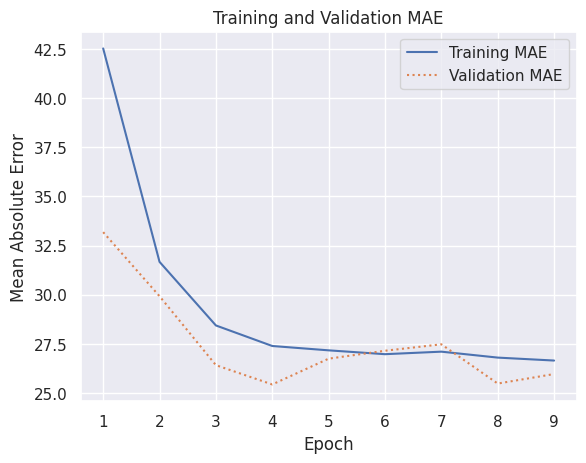

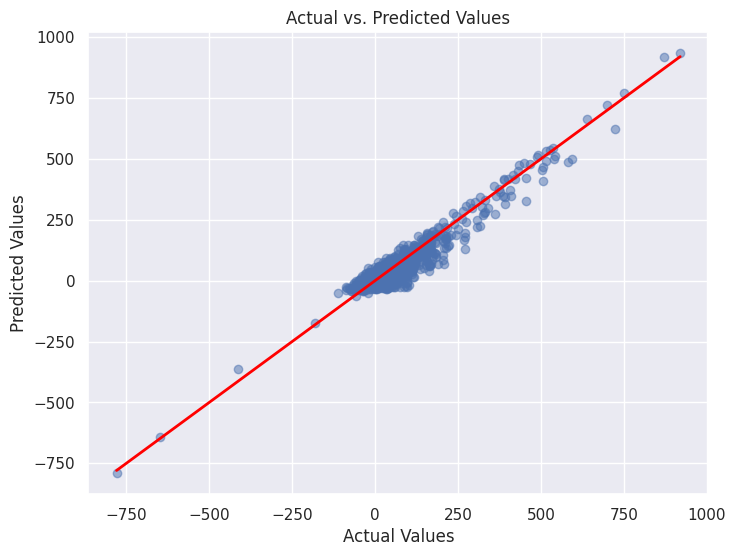

In [315]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=31, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_3 = load_model(filepath)
  y_pred = model_3.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Model3 Version2: During the training process, Dropout function was used to prevent overfitting

In [322]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
#df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [323]:
# network construction
from tensorflow.keras.layers import PReLU
def construct_network_model():
  model_3 = Sequential()
  model_3.add(Dense(32, activation='relu', input_dim=4))
  model_3.add(Dropout(rate=0.1))
  # model_3.add(Dense(64, activation='softmax'))
  model_3.add(Dense(64, activation='relu'))
  model_3.add(Dense(1))
  return model_3

model_3 = construct_network_model()
# model_3.compile(optimizer=Adam(learning_rate=0.02), loss='mae', metrics=['mae'])
model_3.compile(optimizer='adam', loss='mae', metrics=['mae'])
model_3.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 32)                160       
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_229 (Dense)           (None, 64)                2112      
                                                                 
 dense_230 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 28.52425, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 28.52425 to 26.17380, saving model to weights.best.h5

Epoch 3: val_mae improved from 26.17380 to 25.90508, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 25.90508

Epoch 5: val_mae did not improve from 25.90508

Epoch 6: val_mae improved from 25.90508 to 25.53878, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 25.53878

Epoch 8: val_mae did not improve from 25.53878

Epoch 9: val_mae did not improve from 25.53878

Epoch 10: val_mae did not improve from 25.53878

Epoch 11: val_mae did not improve from 25.53878
32/32 [==============================] - 0s 3ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 28.17911298937668
Mean Squared Error: 1366.021005290676
R-squared: 0.9103707651169618
32/32 [==============================] - 0s 4ms/step
--------------------------------------this is result of the model loaded

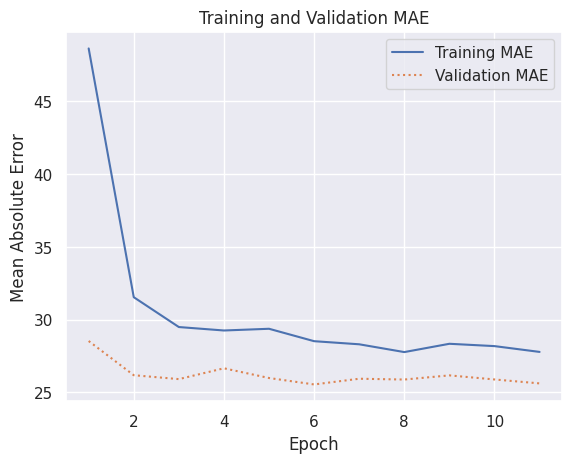

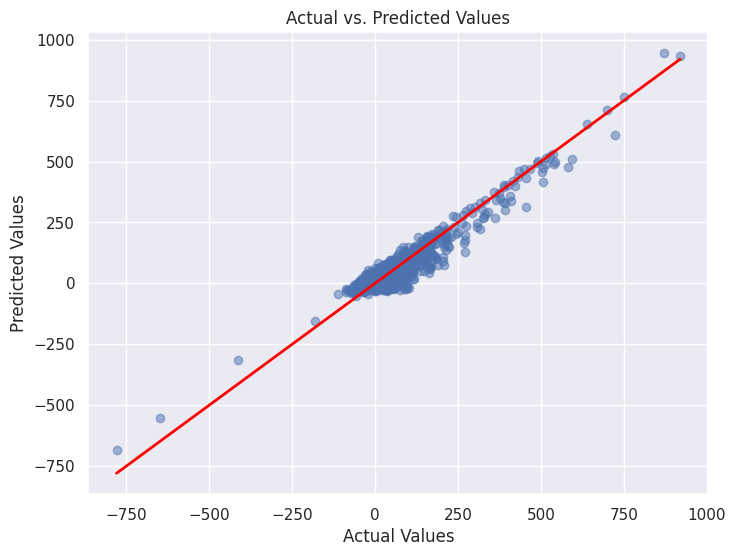

In [324]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=31, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_3 = load_model(filepath)
  y_pred = model_3.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()

### Module 4

In [325]:
# data processing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url)
#df = df.iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [326]:
# network construction
from tensorflow.keras.layers import PReLU
def construct_network_model():
  model_3 = Sequential()
  model_3.add(Dense(64, activation='relu', input_dim=4))
  # model_3.add(Dense(64, activation='softmax'))
  model_3.add(Dropout(rate=0.5))
  model_3.add(Dense(128, activation='relu'))
  model_3.add(Dense(1, activation = 'relu'))
  return model_3

model_3 = construct_network_model()
# model_3.compile(optimizer=Adam(learning_rate=0.02), loss='mae', metrics=['mae'])
model_3.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
model_3.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_231 (Dense)           (None, 64)                320       
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_232 (Dense)           (None, 128)               8320      
                                                                 
 dense_233 (Dense)           (None, 1)                 129       
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1: val_mae improved from inf to 32.99073, saving model to weights.best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 32.99073 to 30.54376, saving model to weights.best.h5

Epoch 3: val_mae did not improve from 30.54376

Epoch 4: val_mae did not improve from 30.54376

Epoch 5: val_mae did not improve from 30.54376

Epoch 6: val_mae did not improve from 30.54376

Epoch 7: val_mae did not improve from 30.54376
32/32 [==============================] - 0s 1ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 34.044965914984246
Mean Squared Error: 2945.285068336823
R-squared: 0.8067499356415143
32/32 [==============================] - 0s 1ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 34.044965914984246
Mean Squared Error: 2945.285068336823
R-squared: 0.8067499356415143


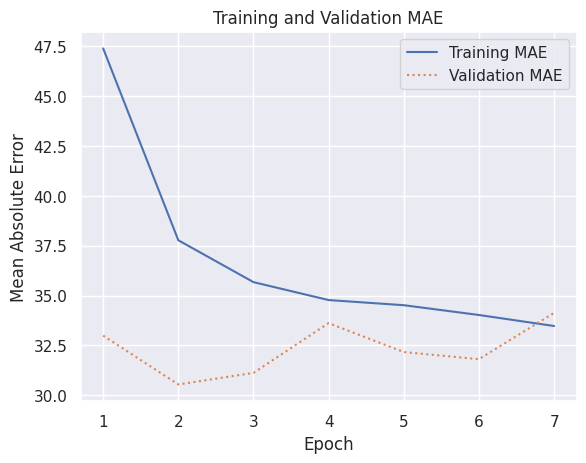

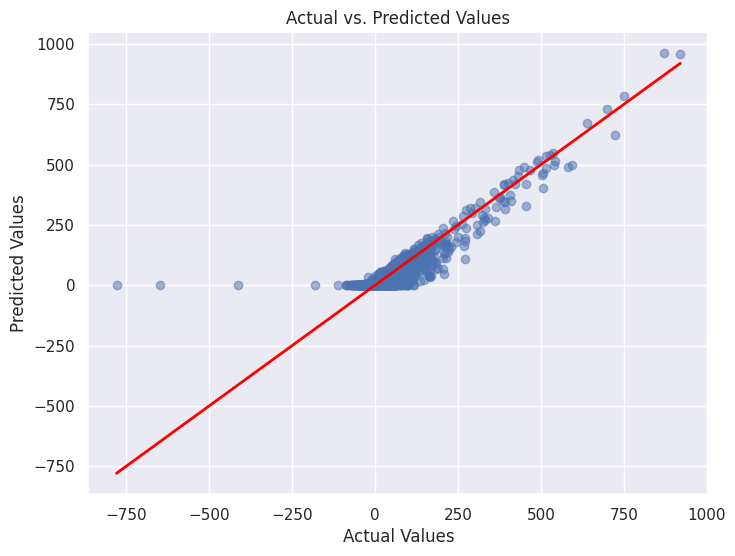

In [327]:
# model training -- choose to use callback function
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
filepath = "weights.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=31, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

# model evaluation and plot
sns.set()
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

y_pred = model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Load model and evaluation
if not filepath =="":
  model_3 = load_model(filepath)
  y_pred = model_3.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha = 0.5)

  # add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle = '-', color = 'red', lw=2)
  plt.show()